In [2]:
#MULTILABEL , MULTICLASS CLASSIFICATION PROBLEM
from keras.datasets import reuters
(train_data,train_labels),(test_data,test_labels)=reuters.load_data(num_words=10000)
print(f"train_data:{train_data.shape} train_labels:{train_labels.shape}")
print(f"test_data:{test_data.shape} test_labels:{test_labels.shape}")

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
train_data:(8982,) train_labels:(8982,)
test_data:(2246,) test_labels:(2246,)


In [4]:
#decoding newswires back to text
word_index=reuters.get_word_index()
reverse_word_index=dict([values,key] for (key,values) in word_index.items())
decoded_newswire=' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [23]:
#preparing the data 
import numpy as np
def vectorize_sequences(sequences,dimension=10000):
    results=np.zeros((len(sequences),dimension))
    for i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
print(f"train_data: {x_train.shape} test_data:{x_test.shape}")

train_data: (8982, 10000) test_data:(2246, 10000)


In [11]:
#preparing the data
def to_one_hot(labels,dimension=46):
    result=np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        result[i,label]=1
    return result

one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)
print(f"train Label:{one_hot_train_labels.shape} test Label:{one_hot_test_labels.shape}")

train Label:(8982, 46) test Label:(2246, 46)


In [14]:
#model definition
from keras import layers,models
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))
print(model)

<Sequential name=sequential, built=True>


C:\Users\skuma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
#compilation of model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
#validating the approach
x_val=x_train[:1000]
partial_x_train=x_train[1000:]
y_val=one_hot_train_labels[:1000]
partial_y_train=one_hot_train_labels[1000:]


In [18]:
#training the model
history=model.fit(partial_x_train,
                  partial_y_train,
                  epochs=20,
                  batch_size=512,
                  validation_data=(x_val,y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4701 - loss: 2.6475 - val_accuracy: 0.6080 - val_loss: 1.7911
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6823 - loss: 1.5262 - val_accuracy: 0.7050 - val_loss: 1.3746
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7408 - loss: 1.1807 - val_accuracy: 0.7220 - val_loss: 1.2120
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7870 - loss: 0.9697 - val_accuracy: 0.7470 - val_loss: 1.1102
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8188 - loss: 0.8121 - val_accuracy: 0.7710 - val_loss: 1.0138
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8488 - loss: 0.6807 - val_accuracy: 0.7840 - val_loss: 0.9703
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8750 - loss: 0.5717 - val_accuracy: 0.8020 - val_loss: 0.9143
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8969 - loss: 0.4824 - val_accuracy: 0.8070 - v

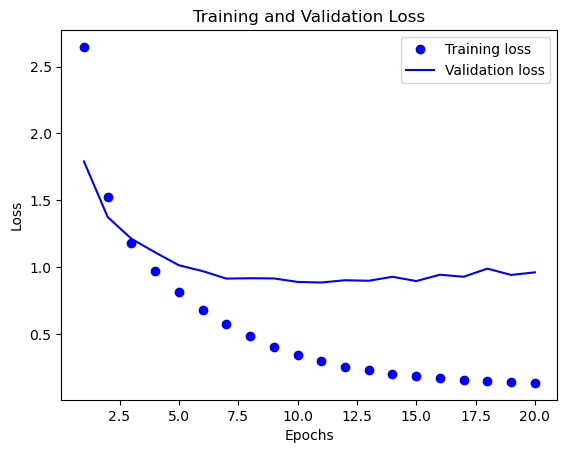

In [19]:
#plotting
import matplotlib.pyplot as plt

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,'bo',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


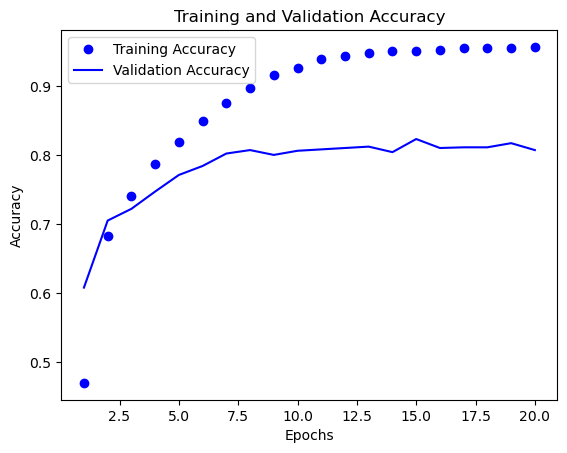

In [20]:
plt.clf()
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs,acc,'bo',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
#above model overfits after 9 epoch
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
    partial_y_train,
    epochs=9,
    batch_size=512,
    validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
print(f"Loss:{results[0]} Accuracy:{results[1]}")

C:\Users\skuma\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.4795 - loss: 2.8044 - val_accuracy: 0.5920 - val_loss: 1.9515
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6604 - loss: 1.6440 - val_accuracy: 0.6720 - val_loss: 1.4677
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7289 - loss: 1.2657 - val_accuracy: 0.7300 - val_loss: 1.2521
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7811 - loss: 1.0353 - val_accuracy: 0.7470 - val_loss: 1.1321
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8132 - loss: 0.8647 - val_accuracy: 0.7690 - val_loss: 1.0474
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8419 - loss: 0.7227 - val_accuracy: 0.7900 - val_loss: 1.0007
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8736 - loss: 0.6042 - val_accuracy: 0.8070 - val_loss: 0.9419
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8948 - loss: 0.5085 - val_accuracy: 0.7910 - val_loss:

In [ ]:
#prediction
prediction=model.predict(x_test)
#class with the highest probability
print(f"prediction:{np.argmax(prediction[0])} Actual Value:{test_labels[0]}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
prediction:3 Actual Value:3
